In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\ALTEM-SERVER\\Desktop\\Dekstop\\New folder\\I Neuron\\Projects\\Text_data_analysis Project\\Youtube_project_shan_singh'

In [3]:
df = pd.read_csv("UScomments.csv", error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

## Perform Sentiment analysis

There are generally tow terms that needs to be considered.
1. Polarity
2. Subjectivity

Polarity:
Polarity gives the Idea about sentiment behind the sentence.
Eg: I like this course - This sentence has seems like a positive statement hence this sentence will have maximum polarity.

value of Polarity lies between +1 and -1. If sentence seems like a very positive satement the polarity will be +1 or else the polarity will be negative.


Subjectivity:
If sentence is not showing any sentimenth then it counted as a subjective sentence.
Eg: I am going to school.
This sentence has no any feeling but it has a subject.


Different packages available for sentiment analysis:
1. TextBlob
2. Vader
3. Epacy

In [5]:
df.shape

(691400, 4)

In [6]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
# Very less null values we can delete it
df.dropna(inplace= True)

In [8]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [9]:
!pip install textblob


In [10]:
from textblob import TextBlob

In [11]:
TextBlob("I am feeling good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [12]:
TextBlob("I am feeling good").sentiment.polarity

0.7

In [13]:
polarity = []
for comments in df['comment_text']:
    try:
        polarity.append(TextBlob(comments).sentiment.polarity)
        
    except:
        polarity.append(0)
        

In [14]:
polarity[0:15]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 -0.13571428571428573,
 0.0,
 0.2,
 -0.023333333333333352,
 0.5,
 0.0]

In [15]:
df['polarity']= polarity

In [16]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

## Wordcloud of your positive and negative sentences

In [17]:
df_positive = df[df['polarity'] == 1]

In [18]:
df_negative= df[df['polarity'] == -1]

In [19]:
df_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [20]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (8.4.0)



In [21]:
pip install stop-words


Note: you may need to restart the kernel to use updated packages.


In [22]:
df_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [23]:
# Convert this series object to string
all_comments = ' '.join(df_negative['comment_text'])

In [24]:
all_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

In [25]:
from wordcloud import WordCloud, STOPWORDS

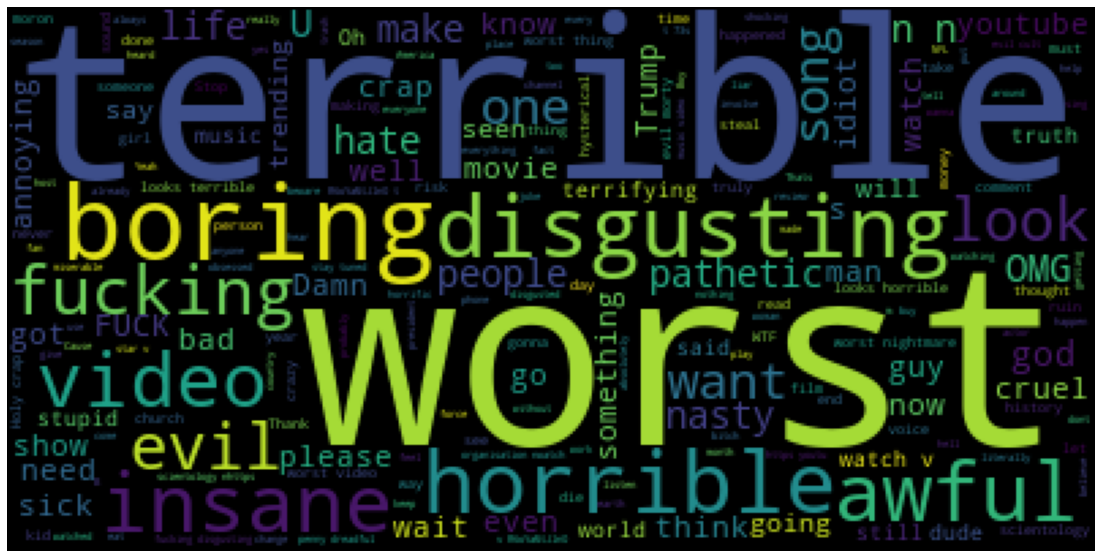

In [26]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(all_comments)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
df_positive['comment_text']

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [28]:
all_positive_comments = ' '.join(df_positive['comment_text'])

In [29]:
all_positive_comments[1:100]

'u are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

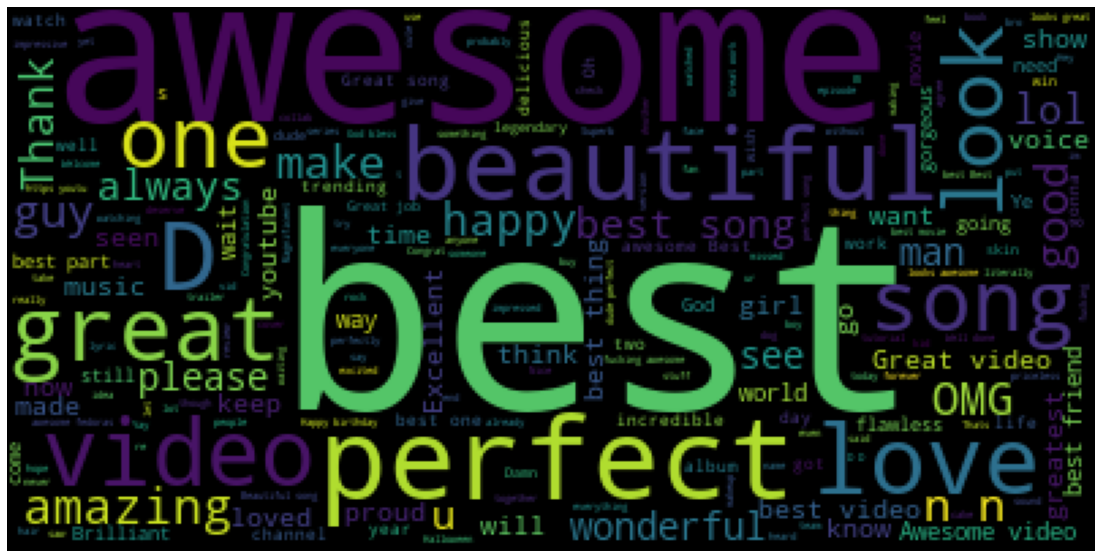

In [30]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(all_positive_comments)
plt.figure(figsize= (20,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

## Emoji's Analysis

In [31]:
!pip install emoji


In [32]:
import emoji

In [33]:
df.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [34]:
emojis = []
for comments in df['comment_text']:
    for char in comments:
        if char in emoji.EMOJI_DATA:
            emojis.append(char)

In [35]:
emojis[1:10]

['‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [36]:
# We have to count the occurances of each emojy and check first 10 most occured emojis
from collections import Counter

In [37]:
emoji_fre = Counter(emojis).most_common(10)

In [38]:
emojis = [emoji_fre[i][0] for i in range(len(emoji_fre))]

In [39]:
frequency = [emoji_fre[i][1] for i in range(len(emoji_fre))]

In [40]:
frequency

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [41]:
import plotly.graph_objs as ob
from plotly.offline import iplot   # To visualize the data inside the jupyter notebook

In [42]:
data = ob.Bar(x= emojis, y = frequency)

In [43]:
iplot([data])

## Try to collect entire data of youtube

In [44]:
import os

In [45]:
path = r'C:\Users\ALTEM-SERVER\Desktop\Dekstop\New folder\I Neuron\Projects\Text_data_analysis Project\Youtube_project_shan_singh\additional_data'

In [61]:
files = os.listdir(path)

In [62]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [63]:
files_csv = [files[i] for i in range(0, len(files), 2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [73]:
all_files = pd.DataFrame()

for file_csv in files_csv:
    path_1= os.path.join(path,file_csv)
    data = pd.read_csv(path_1, encoding='iso-8859-1', error_bad_lines=False)
    
    data['country'] = file_csv.split('.')[0][0:2]
    
    all_files= pd.concat([all_files, data])
    

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [75]:
all_files.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

## Lets Check which category has maximum likes

In [77]:
all_files['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [84]:
# We have other category column where id is mention lets try to read that table
category = pd.read_csv('category_file.txt', sep=':')

In [85]:
category.head()

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports

In [87]:
category.reset_index(inplace=True)

In [88]:
category.head()

index Category_id      Category_name
0      1               Film & Animation
1      2               Autos & Vehicles
2     10                          Music
3     15                 Pets & Animals
4     17                         Sports

In [90]:
category.columns= ['Category_id', 'Category_name']

In [92]:
category.set_index('Category_id', inplace=True)

In [93]:
category.head()

Category_name
Category_id                   
1             Film & Animation
2             Autos & Vehicles
10                       Music
15              Pets & Animals
17                      Sports

In [96]:
dict_ = category.to_dict()

In [97]:
dict_['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [99]:
all_files['category_name'] = all_files['category_id'].map(dict_['Category_name'])

In [100]:
all_files.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

<AxesSubplot:xlabel='category_name'>

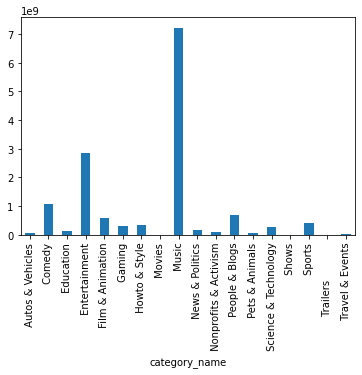

In [105]:
all_files.groupby('category_name')['likes'].sum().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

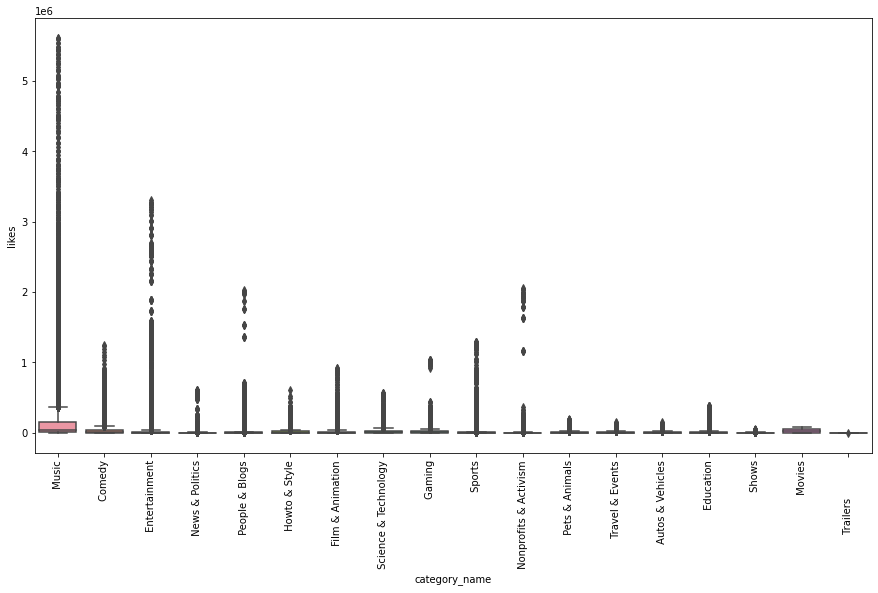

In [119]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name', y='likes', data= all_files)
plt.xticks(rotation='vertical')

## Whether the audience you have is engaged or not

We will try to find like rate, dislike rate, comments rate

In [127]:
all_files['Like_rate'] = (all_files['likes']/all_files['views'])*100
all_files['Dislike_rate'] = (all_files['dislikes']/all_files['views'])*100
all_files['Comments_rate'] = (all_files['comment_count']/all_files['views'])*100

In [123]:
all_files.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music   
1  STill got a lot of packages. Probably will las...      CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy   
3  I know it's been a while since we did this sho...      CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music   

   Like_rate  Dislike_rate  Coments_rate  
0   4.589104      0.253051      0.733639  
1  12.594873      0.166363      1.284185  
2   4.575843      0.167292      0.256342  
3   6.309630      0.094903      0.835851  
4   4.874563      0.062887      0.253752  

[5 rows x 21 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

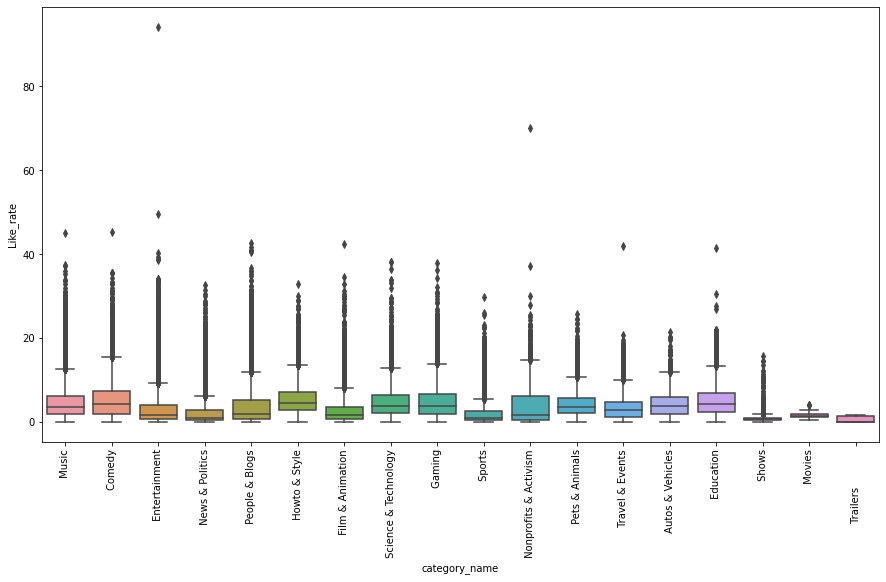

In [124]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name', y='Like_rate', data= all_files)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

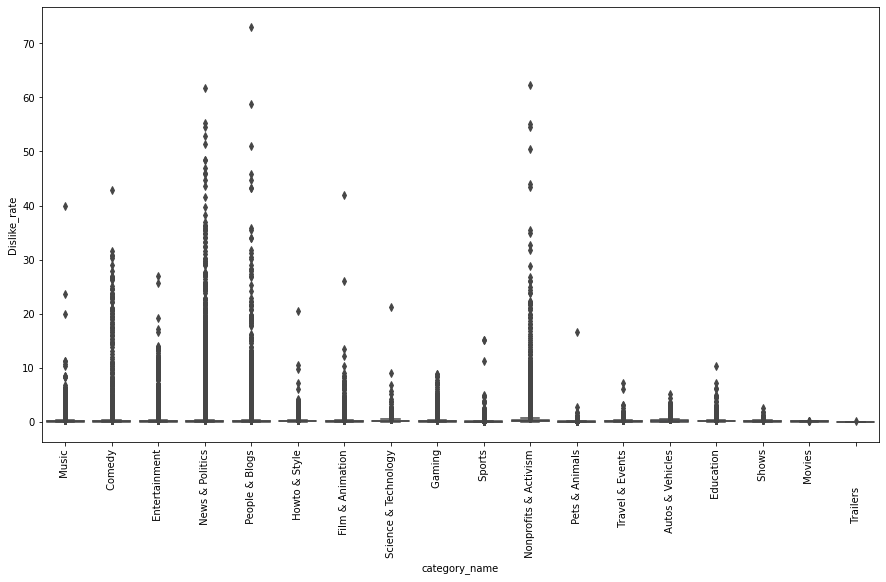

In [125]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name', y='Dislike_rate', data= all_files)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

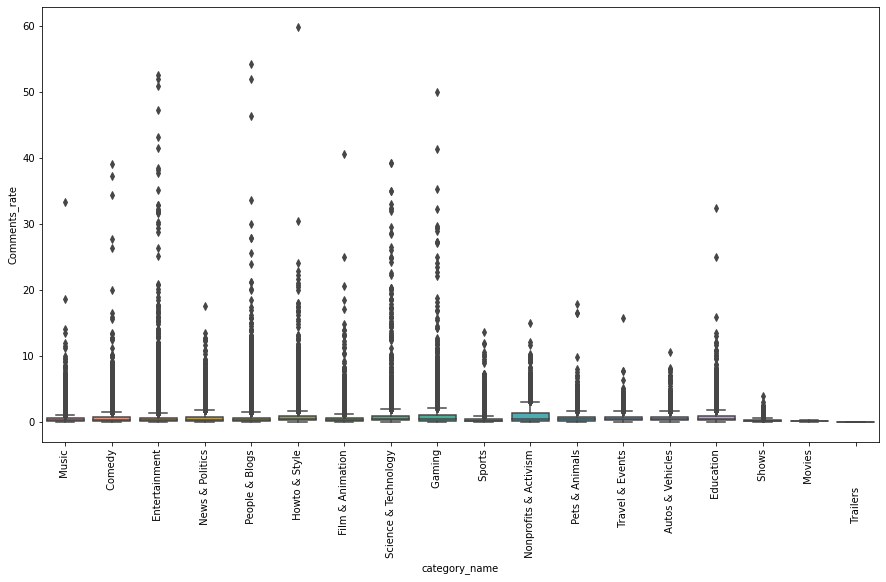

In [128]:
plt.figure(figsize=(15,8))
sns.boxplot(x='category_name', y='Comments_rate', data= all_files)
plt.xticks(rotation='vertical')


## Lets find out which channel have the largest number of trading videos

In [139]:
# Findinf total number of videos per channel
chnl_vdo = all_files.groupby('channel_title')['video_id'].count().sort_values(ascending= False).to_frame().reset_index().rename(columns = {'video_id':'video_count'})

In [140]:
chnl_vdo.head()

channel_title  video_count
0  The Late Show with Stephen Colbert          984
1                                 WWE          804
2         Late Night with Seth Meyers          773
3                           VikatanTV          763
4                        TheEllenShow          743

<AxesSubplot:>

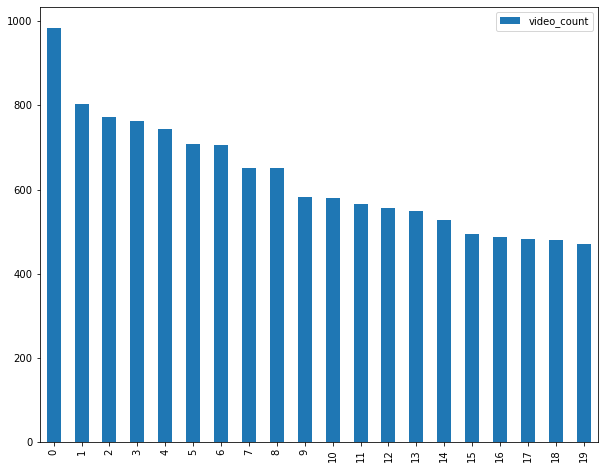

In [142]:
# Visualize top 20 channels
chnl_vdo[0:20].plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Late Show with Stephen Colbert'),
  Text(1, 0, 'WWE'),
  Text(2, 0, 'Late Night with Seth Meyers'),
  Text(3, 0, 'VikatanTV'),
  Text(4, 0, 'TheEllenShow'),
  Text(5, 0, 'Jimmy Kimmel Live'),
  Text(6, 0, 'The Tonight Show Starring Jimmy Fallon'),
  Text(7, 0, 'PewDiePie'),
  Text(8, 0, 'RadaanMedia'),
  Text(9, 0, 'The Late Late Show with James Corden'),
  Text(10, 0, 'CNN'),
  Text(11, 0, 'Netflix'),
  Text(12, 0, 'FBE'),
  Text(13, 0, 'MLG Highlights'),
  Text(14, 0, 'SET India'),
  Text(15, 0, 'Screen Junkies'),
  Text(16, 0, 'ESPN'),
  Text(17, 0, 'Marvel Entertainment'),
  Text(18, 0, 'BuzzFeedVideo'),
  Text(19, 0, 'Warner Bros. Pictures')])

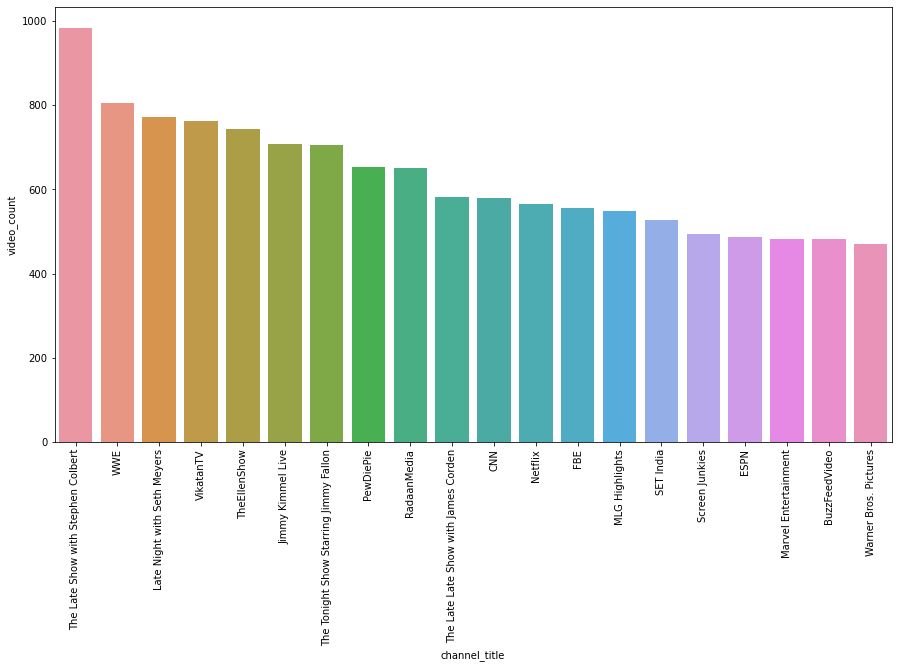

In [146]:
plt.figure(figsize=(15,8))
sns.barplot(x='channel_title', y='video_count', data=chnl_vdo[0:20])
plt.xticks(rotation='vertical')

## Does punctuation in title and tags have any relation with views, likes, dislikes and comments?

In [147]:
import string

In [148]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [149]:
def punctuation_count(x):
    return len([c for c in x if c in string.punctuation])

In [155]:
all_files['title'][0]
                  

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [156]:
sample = all_files[0:1000]

In [157]:
sample['punch_count'] = sample['title'].apply(punctuation_count)

C:\Users\ALTEM-~1\AppData\Local\Temp/ipykernel_39096/1123152821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
sample.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  ratings_disabled video_error_or_removed  \
0     43420  ...             False                  False   
1      1688  ...             False                  False   
2      5339  ...             False                  False   
3      1989  ...             False                  False   
4     21082  ...             False                  False   

                                         description  country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA           Music   
1  STill got a lot of packages. Probably will las...       CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA          Comedy   
3  I know it's been a while since we did this sho...       CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA           Music   

   Like_rate Dislike_rate Coments_rate  Comments_rate  punch_count  
0   4.589104     0.253051     0.733639       0.733639            4  
1  12.594873     0.166363     1.284185       1.284185            1  
2   4.575843     0.167292     0.256342       0.256342            3  
3   6.309630     0.094903     0.835851       0.835851            3  
4   4.874563     0.062887     0.253752       0.253752            3  

[5 rows x 23 columns]

<AxesSubplot:xlabel='punch_count', ylabel='views'>

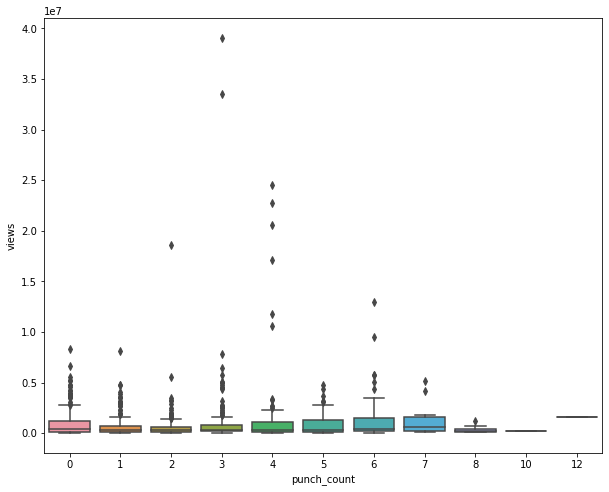

In [160]:
sns.boxplot(x='punch_count', y='views', data=sample)

By seeing the graphs it seems that lesser the punhtation higher the views but we wil check corelation between them also

In [161]:
sample['punch_count'].corr(sample['views'])

0.06447081087620599

But actually they are not corelated.

In [163]:
sample['punch_count'].corr(sample['likes'])

0.06242369596259876

In [164]:
sample['punch_count'].corr(sample['comment_count'])

0.11029238776013547